In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv("C:\\Users\\ASUS\\data_analyst\\da_project\\se_jobs&salary\\Software_Engineer_Salaries.csv")
df

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
...,...,...,...,...,...,...
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN


In [4]:
df.shape

(870, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [6]:
df.isnull().sum()

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

In [7]:
df.describe()

,Company Score
count,789.000000
mean,3.895311
std,0.524952
min,1.000000
25%,3.600000
50%,3.900000
75%,4.200000
max,5.000000


In [8]:
def job_title(title):
    return re.split(r'\(|-|,', title)[0].strip()

df['Job Title'] = df['Job Title'].apply(job_title)

In [9]:
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,Software Engineer,"Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.)
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,$77K - $94K (Glassdoor est.)
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,$71K - $100K (Glassdoor est.)
8,WHOOP,3.3,Software Engineer II,"Boston, MA",10d,$94K - $148K (Glassdoor est.)
9,PFF,4.2,Sr. Software Engineer,Remote,1d,$147K - $189K (Employer est.)


In [10]:
def date_correction(date):
    if 'd' in date:
        return int(date.replace('d', '').replace('+', '').strip())
    
    elif 'h' in date:
        return int(date.replace('h', '').strip())/24
    
    elif 'w' in date:
        return int(date.replace('w', '').strip())/7
    
df['Date'] = df['Date'].apply(date_correction)


In [11]:
df

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8.0,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2.0,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2.0,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,Software Engineer,"Los Angeles, CA",2.0,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2.0,$85K - $108K (Glassdoor est.)
...,...,...,...,...,...,...
865,RXO,NaN,Software Engineer,"San Francisco, CA",6.0,NaN
866,Infosys,NaN,Software Engineer,"Annapolis Junction, MD",18.0,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19.0,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2.0,NaN


In [12]:
def salary_correction(salary):
    salary_range = re.findall(r'\$([\dK]+)', salary )
    salary_info = 'Employer est.' if 'Employer est.' in salary else 'Glassdoor est'
    
#     salary_range = [int(s.replace('K', ''))*1000 for s in salary]
    
    salary_range = [int(s.replace('K', '').replace('$', '').replace(',', '')) * 1000 for s in salary_range]
    
    if len(salary_range) == 2:
        return sum(salary_range)/2, salary_info
    
    else:
        return None, salary_info
    
df['Salary'] = df['Salary'].astype(str)
df[['Annual Salary', 'Estimate Type']] = df['Salary'].apply(lambda x: pd.Series(salary_correction(x)))

df['Employer est'] = df['Estimate Type'] == 'Employer est.'
df['Glassdoor est'] =df['Estimate Type'] == 'Glassdoor est.'

In [13]:
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary,Annual Salary,Estimate Type,Employer est,Glassdoor est
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8.0,$68K - $94K (Glassdoor est.),81000.0,Glassdoor est,False,False
1,Workiva,4.3,Software Support Engineer,Remote,2.0,$61K - $104K (Employer est.),82500.0,Employer est.,True,False
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2.0,$95K - $118K (Glassdoor est.),106500.0,Glassdoor est,False,False
3,Snapchat,3.5,Software Engineer,"Los Angeles, CA",2.0,$97K - $145K (Employer est.),121000.0,Employer est.,True,False
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2.0,$85K - $108K (Glassdoor est.),96500.0,Glassdoor est,False,False
5,Spotify,3.9,Backend Engineer II,"New York, NY",1.0,$123K - $175K (Employer est.),149000.0,Employer est.,True,False
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7.0,$77K - $94K (Glassdoor est.),85500.0,Glassdoor est,False,False
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30.0,$71K - $100K (Glassdoor est.),85500.0,Glassdoor est,False,False
8,WHOOP,3.3,Software Engineer II,"Boston, MA",10.0,$94K - $148K (Glassdoor est.),121000.0,Glassdoor est,False,False
9,PFF,4.2,Sr. Software Engineer,Remote,1.0,$147K - $189K (Employer est.),168000.0,Employer est.,True,False


In [14]:
def loc_correction(location):
    parts = location.split(",")
    
    if len(parts) == 2:
        city = parts[0].strip()
        state = parts[1].strip()
        remote = False
        
    elif 'Remote' in location:
        city, state = None, None
        remote = True
        
    else:
        city, state = location, None
        remote = False
        
    return state, city, remote

df['Location'] = df['Location'].astype(str)
df[['state', 'city', 'remote']] = df['Location'].apply( lambda x : pd.Series(loc_correction(x)))

In [15]:
df

,Company,Company Score,Job Title,Location,Date,Salary,Annual Salary,Estimate Type,Employer est,Glassdoor est,state,city,remote
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8.0,$68K - $94K (Glassdoor est.),81000.0,Glassdoor est,False,False,VA,Manassas,False
1,Workiva,4.3,Software Support Engineer,Remote,2.0,$61K - $104K (Employer est.),82500.0,Employer est.,True,False,None,None,True
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2.0,$95K - $118K (Glassdoor est.),106500.0,Glassdoor est,False,False,NC,Cary,False
3,Snapchat,3.5,Software Engineer,"Los Angeles, CA",2.0,$97K - $145K (Employer est.),121000.0,Employer est.,True,False,CA,Los Angeles,False
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2.0,$85K - $108K (Glassdoor est.),96500.0,Glassdoor est,False,False,TX,Seguin,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,RXO,NaN,Software Engineer,"San Francisco, CA",6.0,nan,NaN,Glassdoor est,False,False,CA,San Francisco,False
866,Infosys,NaN,Software Engineer,"Annapolis Junction, MD",18.0,nan,NaN,Glassdoor est,False,False,MD,Annapolis Junction,False
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19.0,nan,NaN,Glassdoor est,False,False,MI,Southfield,False
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2.0,nan,NaN,Glassdoor est,False,False,NC,Charlotte,False


In [16]:
data_cleaned = df.drop(columns=[ 'Salary', 'Location'])

data_cleaned.head(10)

,Company,Company Score,Job Title,Date,Annual Salary,Estimate Type,Employer est,Glassdoor est,state,city,remote
0,ViewSoft,4.8,Software Engineer,8.0,81000.0,Glassdoor est,False,False,VA,Manassas,False
1,Workiva,4.3,Software Support Engineer,2.0,82500.0,Employer est.,True,False,None,None,True
2,"Garmin International, Inc.",3.9,C# Software Engineer,2.0,106500.0,Glassdoor est,False,False,NC,Cary,False
3,Snapchat,3.5,Software Engineer,2.0,121000.0,Employer est.,True,False,CA,Los Angeles,False
4,Vitesco Technologies Group AG,3.1,Software Engineer,2.0,96500.0,Glassdoor est,False,False,TX,Seguin,False
5,Spotify,3.9,Backend Engineer II,1.0,149000.0,Employer est.,True,False,NY,New York,False
6,Infor,4.0,Associate Software Engineer,7.0,85500.0,Glassdoor est,False,False,GA,Alpharetta,False
7,Amerisoft Corporation,5.0,Software Developers,30.0,85500.0,Glassdoor est,False,False,MI,Farmington Hills,False
8,WHOOP,3.3,Software Engineer II,10.0,121000.0,Glassdoor est,False,False,MA,Boston,False
9,PFF,4.2,Sr. Software Engineer,1.0,168000.0,Employer est.,True,False,None,None,True


In [17]:
data_cleaned.isna().sum()

Company            2
Company Score     81
Job Title          0
Date               0
Annual Salary    133
Estimate Type      0
Employer est       0
Glassdoor est      0
state            139
city              39
remote             0
dtype: int64

In [19]:
data_cleaned['Company'] = data_cleaned['Company'].fillna('Unknown')
data_cleaned['state'] = data_cleaned['state'].fillna('Unknown')
data_cleaned['city'] = data_cleaned['city'].fillna('Unknown')
data_cleaned['Company Score'] = data_cleaned['Company Score'].fillna(data_cleaned['Company Score'].mean())
data_cleaned['Annual Salary'] = data_cleaned['Annual Salary'].fillna(data_cleaned['Annual Salary'].mean())

In [20]:
data_cleaned.isna().sum()

Company          0
Company Score    0
Job Title        0
Date             0
Annual Salary    0
Estimate Type    0
Employer est     0
Glassdoor est    0
state            0
city             0
remote           0
dtype: int64

In [21]:
data_cleaned.head(25).groupby(['Company'])['Annual Salary'].mean()

Company
7-Eleven, Inc.                   117500.0
Adobe                             81500.0
Amerisoft Corporation             85500.0
Amex                             112500.0
Athenahealth                     240000.0
Boston Children's Hospital       137500.0
Garmin International, Inc.       106500.0
HealthMine Services, Inc.         66500.0
Hertz                            179000.0
Honeywell                        113000.0
Infor                             85500.0
Legrand AV                       102500.0
Megaport                         108500.0
PFF                              168000.0
SOFT LABS NA                     106000.0
Salesforce                       101500.0
Snapchat                         105000.0
Spotify                          149000.0
Summit Technologies, Inc.         68500.0
The MITRE Corporation            153500.0
ViewSoft                          81000.0
Vitesco Technologies Group AG     96500.0
WHOOP                            121000.0
Workiva                   

In [22]:
data_cleaned.head(25).groupby(['city'])['Annual Salary'].mean()

city
Aguadilla                 113000.000000
Alpharetta                 85500.000000
Bedford                   153500.000000
Boston                    166166.666667
Cary                      106500.000000
Farmington Hills           85500.000000
Irving                    117500.000000
Los Angeles               105000.000000
Manassas                   81000.000000
Minneapolis-Saint Paul    102500.000000
New York                  149000.000000
Northborough              106000.000000
Plantation                112500.000000
San Francisco             101500.000000
San Jose                   81500.000000
Seattle                   179000.000000
Seguin                     96500.000000
Springfield                68500.000000
Unknown                   105666.666667
nan                       108500.000000
Name: Annual Salary, dtype: float64

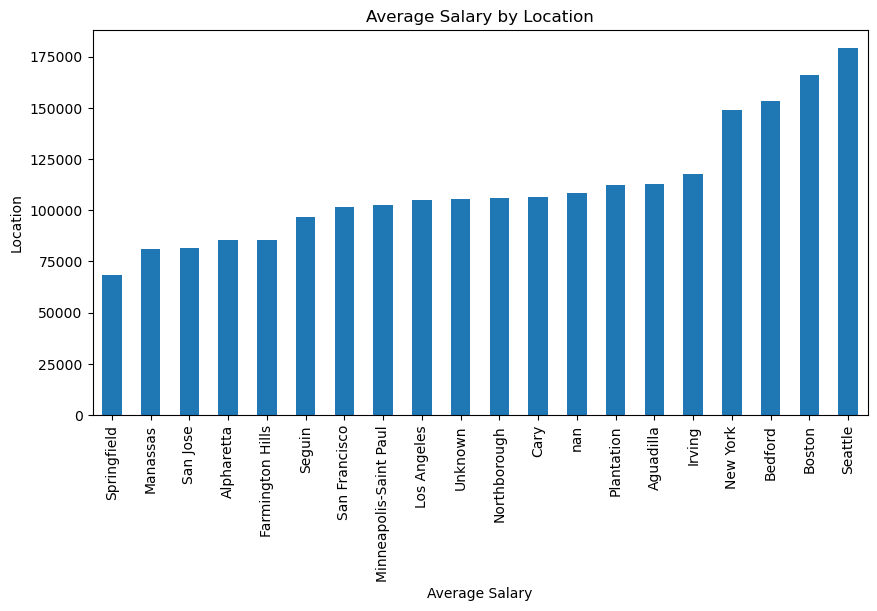

In [29]:
avg_salary_by_location = data_cleaned.head(25).groupby(['city'])['Annual Salary'].mean().sort_values()

avg_salary_by_location.plot(kind = 'bar', figsize=(10,5))
plt.title('Average Salary by Location')
plt.xlabel('Average Salary')
plt.ylabel('Location')
plt.show()

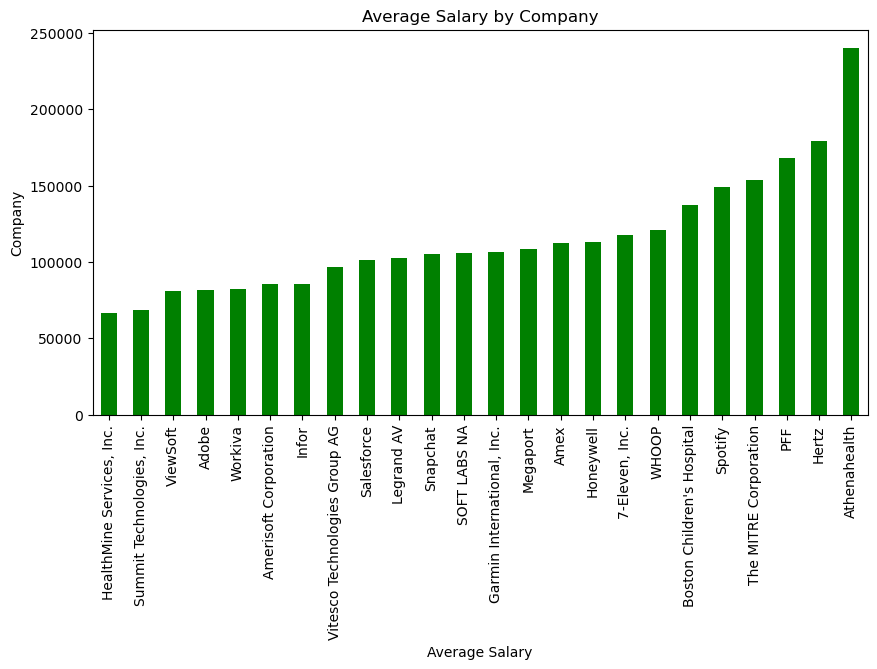

In [35]:
avg_salary_by_location = data_cleaned.head(25).groupby(['Company'])['Annual Salary'].mean().sort_values()

avg_salary_by_location.plot(kind = 'bar', figsize=(10,5), color = 'g')
plt.title('Average Salary by Company')
plt.xlabel('Average Salary')
plt.ylabel('Company')
plt.show()

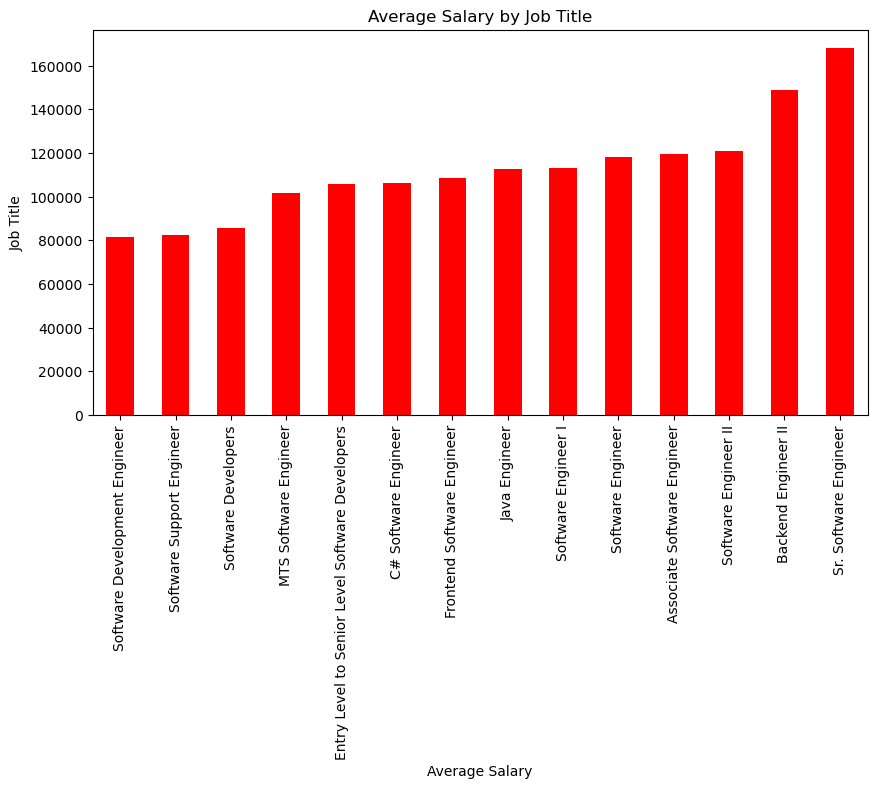

In [41]:
avg_salary_by_location = data_cleaned.head(25).groupby(['Job Title'])['Annual Salary'].mean().sort_values()

avg_salary_by_location.plot(kind = 'bar', figsize=(10,5), color = 'r')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()

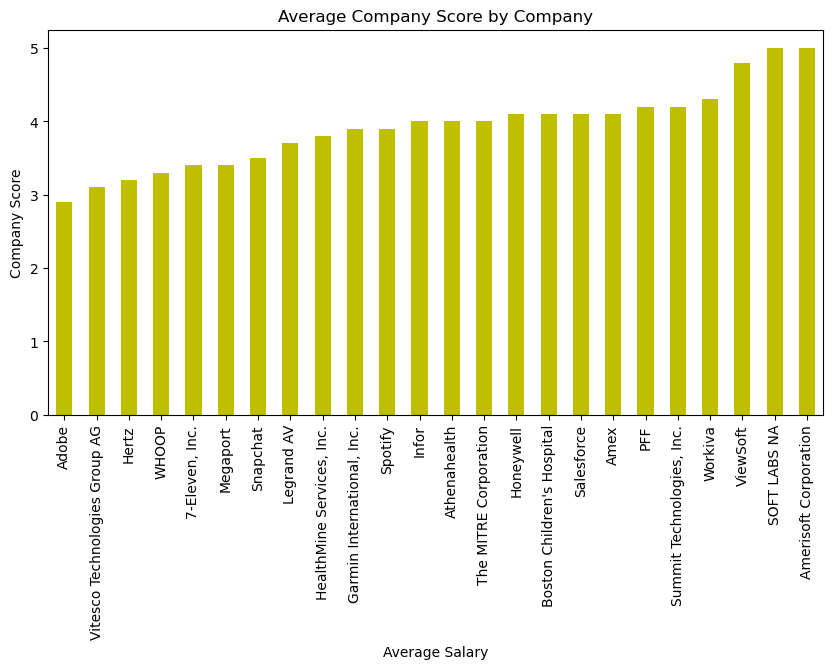

In [36]:
avg_salary_by_location = data_cleaned.head(25).groupby(['Company'])['Company Score'].mean().sort_values()

avg_salary_by_location.plot(kind = 'bar', figsize=(10,5), color = 'y')
plt.title('Average Company Score by Company')
plt.xlabel('Average Salary')
plt.ylabel('Company Score')
plt.show()

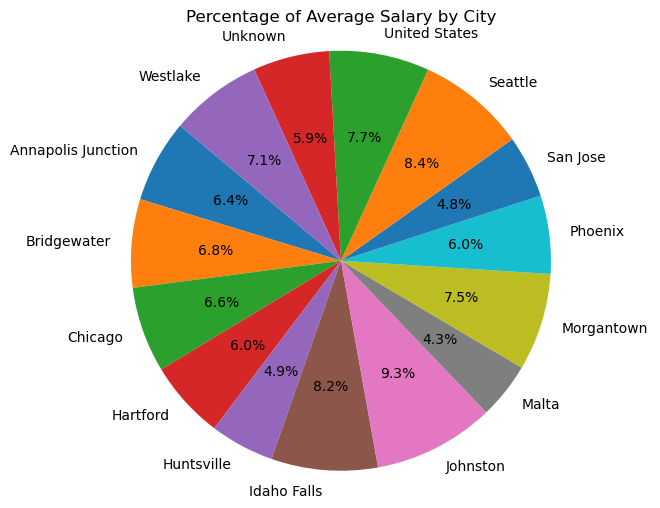

In [46]:
city_salary=data_cleaned.sample(20).groupby(['city'])['Annual Salary'].mean()

labels = city_salary.index
sizes = city_salary.values
# custom_colors = ['#ff9999', '#ff66b3', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Average Salary by City')
plt.axis('equal')
plt.show()